In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps


# Google developer API key

#from config import gkey

# Configure gmaps


# File to Load
crimes_data = "Input/crime_data.csv"

# Read the Crimes Data
crimes_data_df = pd.read_csv(crimes_data)


# Display the data table for preview
crimes_data_df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [2]:
# Combining similar offenses together
crimes_data_df["Primary Type"] = crimes_data_df["Primary Type"].replace(
   {"THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
    "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
    "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
    "OTHER OFFENSES", "GAMBLING":"OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
    "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
    "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
    "NON-CRIMINAL": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
    "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES","PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
    "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES", "DOMESTIC VIOLENCE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "HOMICIDE": "OTHER OFFENSES"})




In [3]:

#Number of Unique Crimes

crimes_count = crimes_data_df.groupby('Primary Type')['ID'].nunique()
crimes_count_df = pd.DataFrame(crimes_count)


#Rename:
crimes_analysis_df = crimes_count_df.rename(columns={"ID": "Number of Crimes"})

crimes_analysis_df


,Number of Crimes
Primary Type,
ASSAULT,645607
CRIMINAL DAMAGE,364348
DECEPTIVE PRACTICE,105556
NARCOTICS,240192
OTHER OFFENSES,248297
SEX CRIMES,32422
THEFT & ROBBERY,899730


In [4]:
#Percentages:
#------------
#total number of crimes
total_crimes = crimes_analysis_df['Number of Crimes'].sum()
crime_type = crimes_analysis_df['Number of Crimes']

#Percentage of Total Fares
crime_percentage = round((crime_type)*100/(total_crimes),2)
crime_percentage_df = pd.DataFrame(crime_percentage)

#Reset the index of Crimes Analysis DataFrame, to get the Crime Types as column and not index
#crime_percentage_df = crime_percentage_df.reset_index(drop=False)

#Rename:
crime_percentage_df = crime_percentage_df.rename(columns={"Number of Crimes": "Percentage of Crimes"})


crime_percentage_df 

,Percentage of Crimes
Primary Type,
ASSAULT,25.46
CRIMINAL DAMAGE,14.37
DECEPTIVE PRACTICE,4.16
NARCOTICS,9.47
OTHER OFFENSES,9.79
SEX CRIMES,1.28
THEFT & ROBBERY,35.48


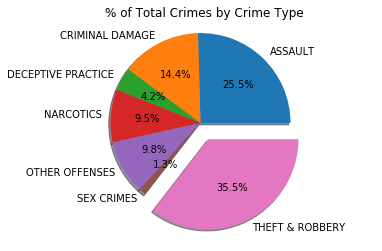

In [5]:
#PIE CHART:
#Labels:
type_list = crime_percentage_df.keys()

# Seperate the "Urban" section from the others
explode = (0, 0, 0, 0, 0, 0, 0.2)


# Build Pie Chart
crimes_pie = crime_percentage_df.plot(kind="pie", y=type_list, autopct="%1.1f%%", explode=explode, shadow=True, title=("% of Total Crimes by Crime Type"))
crimes_pie.set_ylabel("")



#remove legend
plt.gca().legend_.remove()

# Make the pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../crimes_pie.png")

# Print our pie chart to the screen
plt.show()


In [6]:
#dataframe for nb of arrests:
crimes_data_df["Arrest"] = crimes_data_df["Arrest"].astype('str') 


In [7]:
arrests_crimes_df = crimes_data_df.loc[crimes_data_df["Arrest"] == "True", :]

#Number of Arrests

arrest_count = arrests_crimes_df.groupby('Primary Type')['Arrest'].count()
arrest_count_df = pd.DataFrame(arrest_count)
#Rename:
arrest_count_df  = arrest_count_df.rename(columns={"Arrest": "Number of Arrests"})
arrest_count_df 

,Number of Arrests
Primary Type,
ASSAULT,142002
CRIMINAL DAMAGE,70936
DECEPTIVE PRACTICE,15742
NARCOTICS,238948
OTHER OFFENSES,85454
SEX CRIMES,25479
THEFT & ROBBERY,94420


In [8]:
#merge arrests and crimes:
arrests_crimes = pd.merge(crimes_analysis_df,arrest_count_df, on="Primary Type")
arrests_crimes

,Number of Crimes,Number of Arrests
Primary Type,,
ASSAULT,645607,142002
CRIMINAL DAMAGE,364348,70936
DECEPTIVE PRACTICE,105556,15742
NARCOTICS,240192,238948
OTHER OFFENSES,248297,85454
SEX CRIMES,32422,25479
THEFT & ROBBERY,899730,94420


In [9]:
#reset the index to get the list of crime types
arrests_crimes = arrests_crimes.reset_index(drop=False)
crimes_list =  arrests_crimes["Primary Type"]
crimes_list 

0               ASSAULT
1       CRIMINAL DAMAGE
2    DECEPTIVE PRACTICE
3             NARCOTICS
4        OTHER OFFENSES
5            SEX CRIMES
6       THEFT & ROBBERY
Name: Primary Type, dtype: object

([<matplotlib.axis.XTick at 0x10a6cc320>,
 <a list of 7 Text xticklabel objects>)

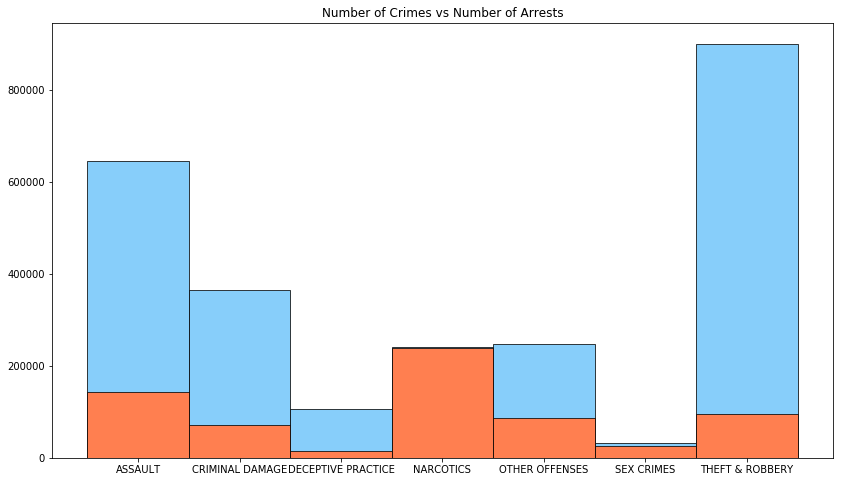

In [10]:
#Visualize: Arrest vs Crimes :
fig = plt.figure(figsize=(14, 8))
nb_crimes= arrests_crimes['Number of Crimes']
nb_arrests= arrests_crimes['Number of Arrests']
x_axis = np.arange(0, len(arrests_crimes))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)



plt.bar(x_axis,  nb_crimes, width=1.0, color='lightskyblue', edgecolor="black", linewidth="0.75", align="center")

plt.bar(x_axis,  nb_arrests, width=1.0, color='coral', edgecolor="black", linewidth="0.75", align="center")
plt.title(f"Number of Crimes vs Number of Arrests")


plt.xticks(tick_locations, crimes_list )

In [11]:
#by year total nb of arrest vs total nb of crimes:
arrest_year = arrests_crimes_df.groupby('Year')['Arrest'].count()
arrest_year_df = pd.DataFrame(arrest_year)
crime_year = crimes_data_df.groupby('Year')['Primary Type'].count()
crime_year_df = pd.DataFrame(crime_year)
#merge the two dataframes:
crime_arrest_year = pd.merge(crime_year_df,arrest_year_df, on="Year")
crime_arrest_year = crime_arrest_year.rename(columns={"Primary Type": "Number of Crimes", "Arrest": "Number of Arrests"})
crime_arrest_year.head()

,Number of Crimes,Number of Arrests
Year,,
2001,484647,141808
2002,138419,40944
2003,104372,30884
2004,102769,31303
2005,100466,30670


([<matplotlib.axis.XTick at 0x10b290f60>,
 <a list of 18 Text xticklabel objects>)

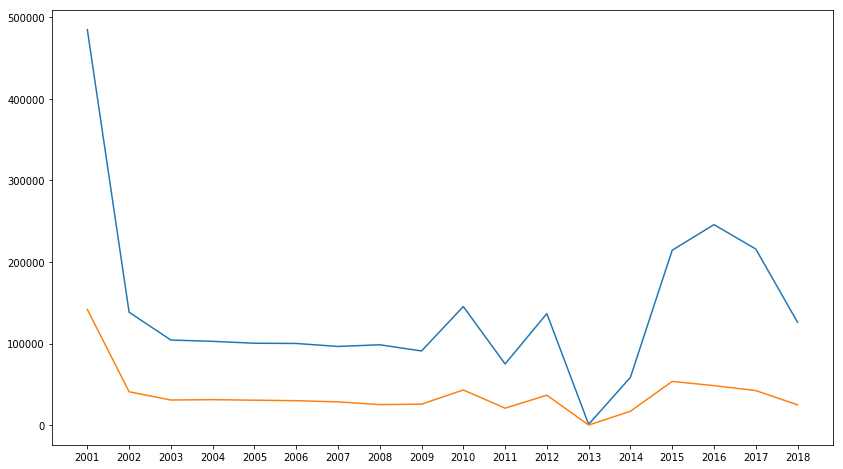

In [12]:
#line plots
#Reset the index of the DataFrame, to get the Years as column and not index
crime_arrest_year = crime_arrest_year.reset_index(drop=False)

year_list = crime_arrest_year["Year"]

x_axis = np.arange(0, len(crime_arrest_year))
y_axis1 = crime_arrest_year["Number of Crimes"]
y_axis2 = crime_arrest_year["Number of Arrests"]

tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
fig = plt.figure(figsize=(14, 8))    
plt.plot(x_axis, y_axis1)
plt.plot(x_axis, y_axis2)

plt.xticks(tick_locations, year_list)

In [13]:
#dataframe with all crimes by ward
# Store latitude and longitude in locations
ward_all_df = pd.DataFrame(crimes_data_df.groupby("Ward")["Primary Type"].count())
ward_all_df = ward_all_df.reset_index(drop=False)
# Collect the mean unemployment rates for the world
number_crimes_all = ward_all_df["Primary Type"]

# Collect the years where data was collected
ward_all_keys = ward_all_df["Ward"]
x_axis = np.arange(len(ward_all_df))
ward_all_df.head()

,Ward,Primary Type
0,1.0,38693
1,2.0,79430
2,3.0,58469
3,4.0,37018
4,5.0,47192


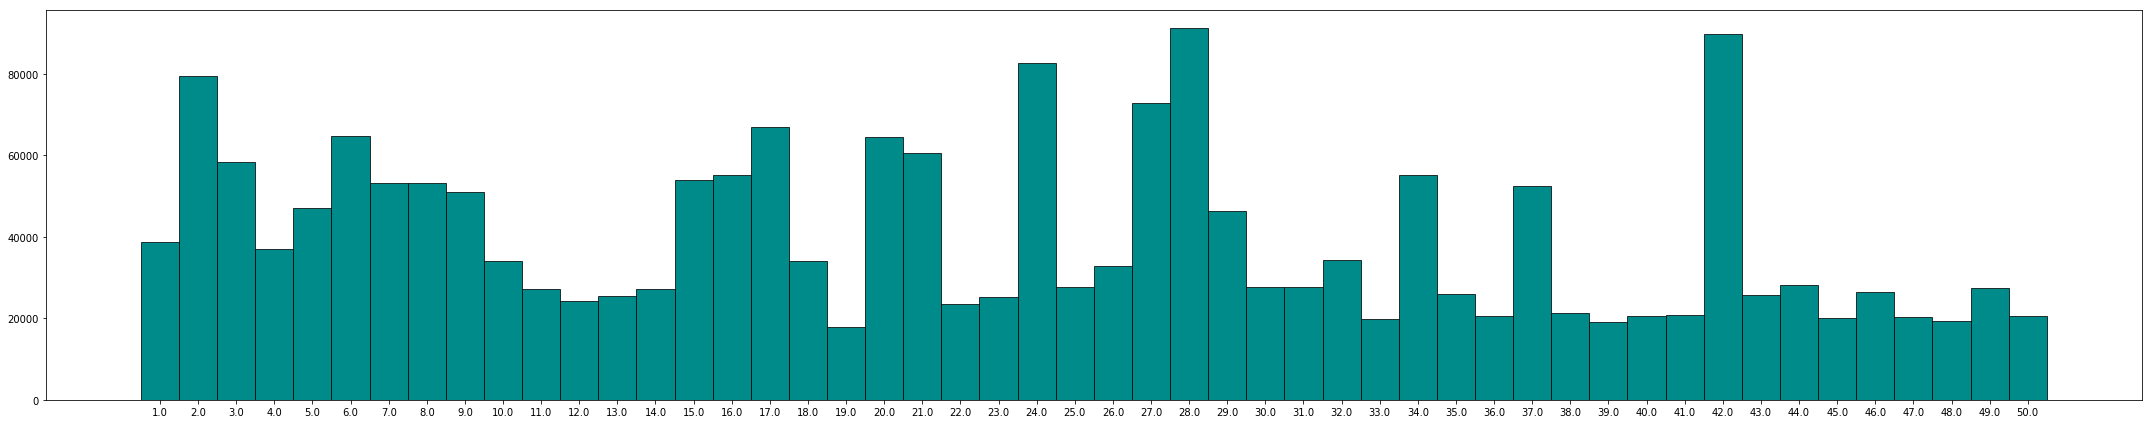

In [14]:

plt.figure(figsize=(30,6))
tick_all_locations = []
for x in x_axis:
    tick_all_locations.append(x)
plt.bar(x_axis, number_crimes_all, width=1.0, color="darkcyan", edgecolor="black", linewidth="0.75", align="center")
plt.xticks(tick_all_locations, ward_all_df["Ward"], rotation="horizontal")
plt.tight_layout()


In [15]:
#Ward 28: 
#study the percentages of crimes in the the ward with the highest number of crimes
#dataframe for nb of arrests:
ward28_crimes_df = crimes_data_df.loc[crimes_data_df["Ward"] == "28.0", :]


#Number of Unique Crimes

ward28_crimes_count = ward28_crimes_df.groupby('Primary Type')['ID'].nunique()
ward28_crimes_count_df = pd.DataFrame(ward28_crimes_count)


#Rename:
ward28_analysis_df = ward28_crimes_count_df.rename(columns={"ID": "Number of Crimes"})

ward28_analysis_df


/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [ ]:
#Percentages:
#------------
#total number of crimes
ward28_total_crimes = ward28_analysis_df['Number of Crimes'].sum()
ward28_crime_type = ward28_analysis_df['Number of Crimes']

#Percentage of Total Fares
ward28_crime_percentage = round((ward28_crime_type)*100/(ward28_total_crimes),2)
ward28_crime_percentage_df = pd.DataFrame(ward28_crime_percentage)



#Rename:
ward28_crime_percentage_df = ward28_crime_percentage_df.rename(columns={"Number of Crimes": "Percentage of Crimes"})


ward28_crime_percentage_df 

In [16]:
#PIE CHART:
#Labels:
ward28_type_list = ward28_crime_percentage_df.keys()

# Seperate the "Urban" section from the others
explode = (0, 0, 0, 0, 0, 0, 0.2)


# Build Pie Chart
ward28_crimes_pie = ward28_crime_percentage_df.plot(kind="pie", y=ward28_type_list, autopct="%1.1f%%", explode=explode, shadow=True, title=("% of Total Crimes by Crime Type"))
ward28_crimes_pie.set_ylabel("")



#remove legend
plt.gca().legend_.remove()

# Make the pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../ward28_crimes_pie.png")

# Print our pie chart to the screen
plt.show()


NameError: name 'ward28_crime_percentage_df' is not defined

In [17]:
#dataframe with only robberies:
theft_crime_df = crimes_data_df.loc[crimes_data_df["Primary Type"] == "THEFT & ROBBERY", :]

# Store latitude and longitude in locations
ward_df = pd.DataFrame(theft_crime_df.groupby("Ward")["Primary Type"].count())
ward_df = ward_df.reset_index(drop=False)
# Collect the mean unemployment rates for the world
number_crimes = ward_df["Primary Type"]

# Collect the years where data was collected
ward_keys = ward_df["Ward"]
x_axis = np.arange(len(ward_df))

ward_df.head()

,Ward,Primary Type
0,1.0,20078
1,2.0,32907
2,3.0,16918
3,4.0,14479
4,5.0,16852


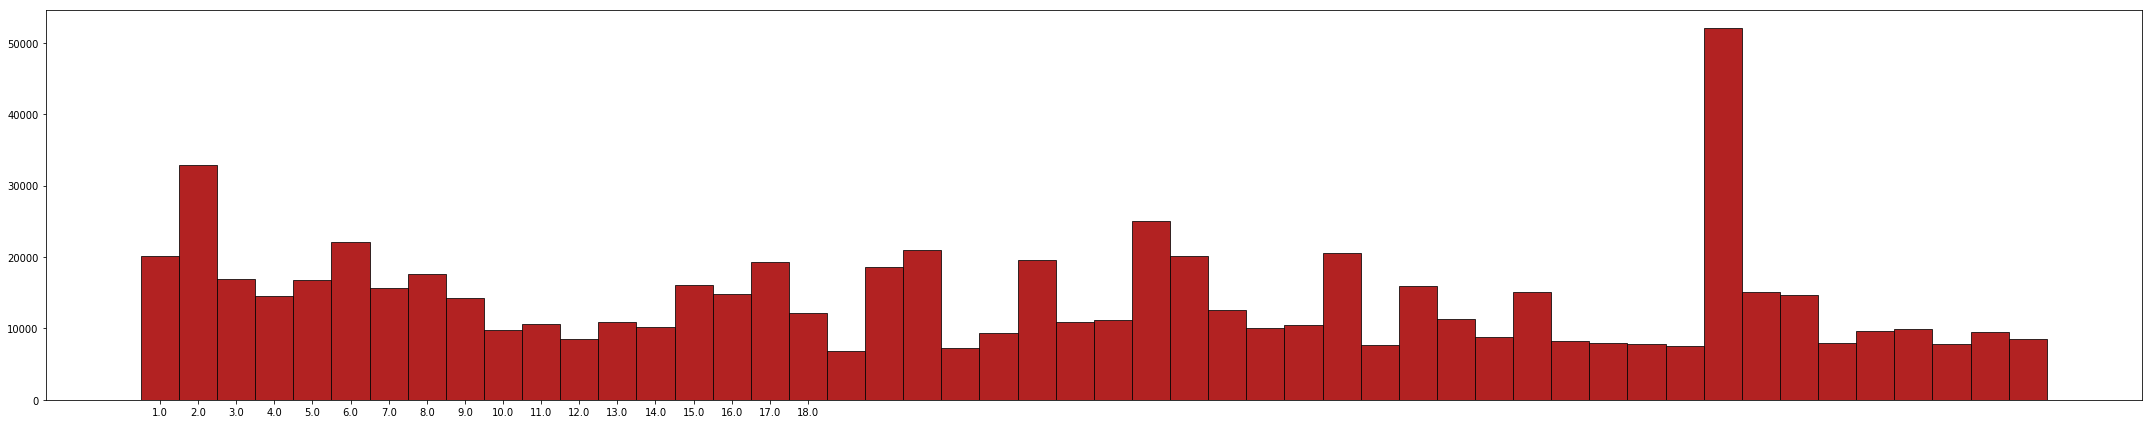

In [18]:
plt.figure(figsize=(30,6))
tick_all_locations = []
for x in x_axis:
    tick_all_locations.append(x)
plt.bar(x_axis, number_crimes, width=1.0, color="firebrick", edgecolor="black", linewidth="0.75", align="center")
plt.xticks(tick_locations, ward_df["Ward"], rotation="horizontal")
plt.tight_layout()

In [19]:
#Ward 42:
#year with the highest increase of robbery in this ward:
#scatter plot with nb of robberies 



In [20]:


# Store latitude and longitude in locations
locations = theft_crime_df[["Latitude","Longitude"]]                             
# Drop all rows with missing informationl
locations = locations.dropna(how='any')
locations = locations.reset_index(drop=True)
locations.head()


,Latitude,Longitude
0,41.878065,-87.743354
1,41.894946,-87.754875
2,41.754603,-87.562651
3,41.910313,-87.687806
4,41.768167,-87.659054


In [21]:
# Plot Heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))